# <center> Comparison of SEI Models in SPM (with Uniform Diffusion) VS in DFN  at Low C-Rate</center>



"Idea: The primary objective of this tutorial is to compare all available SEI models at low C-rate in SPM model with uniform diffusion versus DFN model.


In [142]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
param = pybamm.ParameterValues("Chen2020")

In [143]:
param['Initial inner SEI thickness [m]'] = 5e-12
param['Initial outer SEI thickness [m]'] = 5e-12

Remember, 'experiment' is a string-based way to set up how the battery will be cycled. (More information can be found in Tutorial 5.)

In [144]:

cycle_no = 1
exp_CCCV = pybamm.Experiment(
    [("Charge at C/50 until 4.2 V",
      "Rest for 10 hours",
      "Discharge at C/50 until 2.5 V",
      )] * cycle_no
)

Comparison single partcicle model (SPM) with Doyle-Fuller-Newman Model  (DFN) with uniform diffison lithoum in option along particles.

In [145]:
from os import name


sei_models = ["electron-migration limited"]

# sei_models = ["reaction limited", "solvent-diffusion limited"]
sei_models = ["solvent-diffusion limited"]
# Diffferent SEI models can be used, by setting the index of sei_models


name_models = ["DFN", "SPM Uniform"]
models_DFN = [pybamm.lithium_ion.DFN(options={
    "SEI": sei_models[index],
    "SEI porosity change": "true",
},
    name="DFN " + sei_models[index]) for index in range(len(sei_models))
]
models_SPM = [pybamm.lithium_ion.SPM(options={
    "SEI": sei_models[index],
    "SEI porosity change": "true",
    "particle": "uniform profile",
},
    name="SPM_Uni" + sei_models[index]) for index in range(len(sei_models))
]

In [146]:
# models_DFN[0].variable_names()

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',
 'X-averaged negative electrode interface utilisation',
 'Positive electrode interface utilisation variable',
 'X-averaged positive electrode interface utilisation variable',
 'Positive electrode interface utilisation',
 'X-averaged positive electrode interface utilisation',
 'Negative particle crack length [m]',
 'X-averaged negative particle crack length [m]',
 'Negative particle cracking rate [m.s-1]',
 'X-averaged negative particle cracking rate [m.s-1]',
 'Positive particle crack length [m]',
 'X-averaged positive 

In [147]:
# please note that the size of sims will be equal to the number of models times the number of experiments
sims_DFN = [pybamm.Simulation(model, parameter_values=param,
                              experiment=exp_CCCV) for model in models_DFN]
sims_SPM = [pybamm.Simulation(model, parameter_values=param,
                              experiment=exp_CCCV) for model in models_SPM]

Combine all solutions for the different SEI modesl in DFN and SPM and models in the list 'sols' Odd =DFN and Evens = SPM (unifrm diffusion in the particle)

In [148]:
sols_DFN = [sim.solve(initial_soc=0) for sim in sims_DFN]
sols_SPM = [sim.solve(initial_soc=0) for sim in sims_SPM]

In [149]:
# Vaiables to be postprocessed, you can add as many as output variables to the following list
# you can find the list variables to be be output by typing model name dot varaible_name() e.g. here, models[0].variable_names()
out_vars = ['X-averaged negative particle surface concentration [mol.m-3]',
            "Voltage [V]",
            'X-averaged total SEI thickness [m]',
            'X-averaged negative electrode porosity',
            ]

# Label for the output variables y-axis in the plots
yaxis_labels = ["cn",  "Voltage", "SEI_thickness",
                "porosity"]

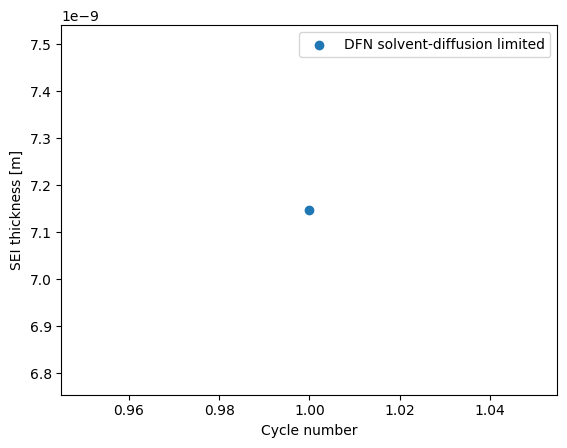

In [150]:

from matplotlib import lines

for sol in sols_DFN:  # loop through the solutions of the DFN models
    LS_cycles = [sol.cycles[k].steps[2]['X-averaged SEI thickness [m]'].entries[-1]
                 for k in range(cycle_no)]
    plt.scatter(np.arange(1, cycle_no+1), LS_cycles,
                label=models_DFN[sols_DFN.index(sol)].name)
plt.xlabel("Cycle number")
plt.ylabel("SEI thickness [m]")
plt.legend()
plt.show()

In [151]:
# from matplotlib import lines


# for out_var in out_vars:  # Loop through the output variables
#     for sol in sols_DFN:  # loop through the solutions of the DFN models
#         plt.plot(sol['Time [h]'].entries, sol[out_var].entries,
#                  label=models_DFN[sols_DFN.index(sol)].name)
#     for sol in sols_SPM:  # loop through the solutions of the SPM models
#         plt.plot(sol['Time [h]'].entries, sol[out_var].entries,
#                  linestyle='--',
#                  label=models_SPM[sols_SPM.index(sol)].name)

#     plt.xlabel("Time [h]")
#     plt.ylabel(yaxis_labels[out_vars.index(out_var)])
#     plt.legend()
#     plt.show()

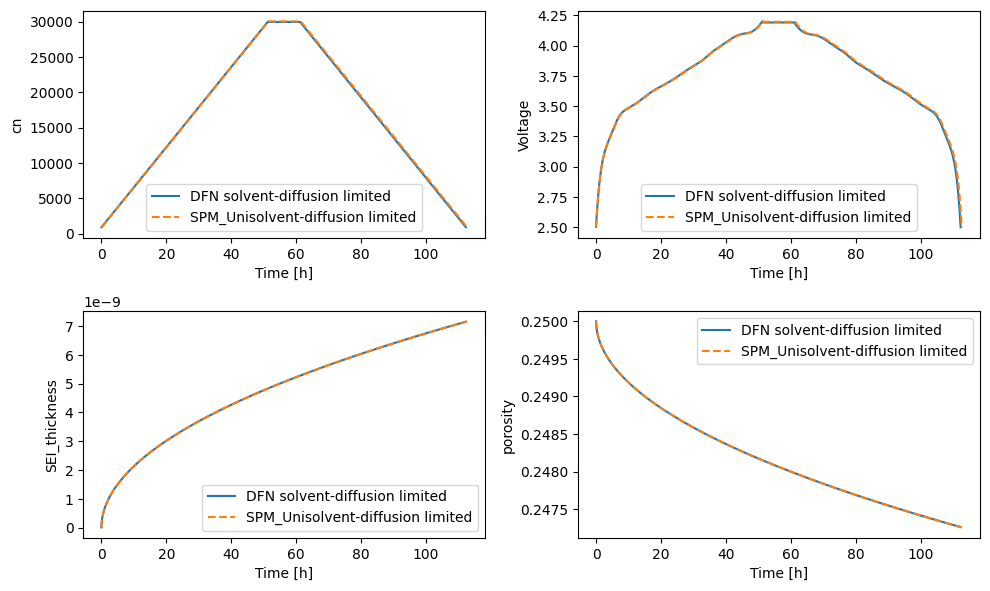

In [152]:
import matplotlib.pyplot as plt

# Assuming out_vars is a list of output variables

# Determine the number of rows and columns for subplots
num_plots = len(out_vars)
num_cols = 2  # Two columns
num_rows = num_plots // num_cols

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

# Loop through the output variables
for i, out_var in enumerate(out_vars):
    # Determine the row and column for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Plot on the appropriate subplot
    ax = axes[row, col]

    # Loop through the solutions of the DFN models
    for sol in sols_DFN:
        ax.plot(sol['Time [h]'].entries, sol[out_var].entries,
                label=models_DFN[sols_DFN.index(sol)].name)

    # Loop through the solutions of the SPM models
    for sol in sols_SPM:
        ax.plot(sol['Time [h]'].entries, sol[out_var].entries,
                linestyle='--',
                label=models_SPM[sols_SPM.index(sol)].name)

    ax.set_xlabel("Time [h]")
    ax.set_ylabel(yaxis_labels[out_vars.index(out_var)])
    ax.legend()

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()